In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
y_train[4], x_train[4]

3 <class 'numpy.uint8'>


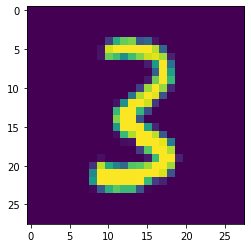

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

In [5]:
x_train = x_train.reshape(-1, 28*28) / 255
x_train.shape

(60000, 784)

In [6]:
x_test = x_test.reshape(-1, 28*28) / 255
x_test.shape

(10000, 784)

In [7]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [8]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden
model.add(tf.keras.layers.Dense(64, activation='relu'))
# 3개 이상 --> softmax
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output
# binary --> sigmoid

# regression --> loss : mse
# binary classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy (sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [11]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3219 - acc: 0.9075 - val_loss: 0.1821 - val_acc: 0.9464
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1531 - acc: 0.9546 - val_loss: 0.1621 - val_acc: 0.9516
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1119 - acc: 0.9662 - val_loss: 0.1560 - val_acc: 0.9531
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0873 - acc: 0.9736 - val_loss: 0.1280 - val_acc: 0.9636
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0704 - acc: 0.9785 - val_loss: 0.1185 - val_acc: 0.9660
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0573 - acc: 0.9815 - val_loss: 0.1221 - val_acc: 0.9664
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0459 - acc: 0.9851 - val_loss: 0.1201 - val_acc: 0.9683
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [12]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

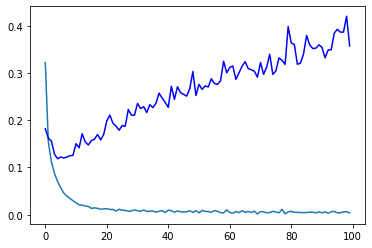

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

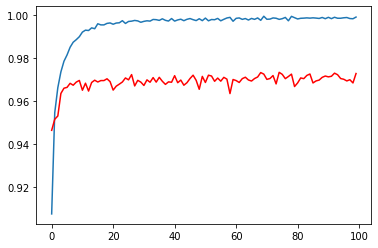

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# service

In [15]:
y_test[30]

3

In [21]:
import numpy as np
# np.set_printoptions(precision=8)

pred = model.predict(x_test[30:31])
pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 5.8489150e-34, 0.0000000e+00, 1.1790589e-34,
        0.0000000e+00, 1.4442462e-31]], dtype=float32)

In [22]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


In [23]:
model.save('./model_save01.h5')

In [27]:
model_load = tf.keras.models.load_model('./model_save01.h5')
model_load

In [28]:
load_pred = model_load.predict(x_test[30:31])
load_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 5.8489150e-34, 0.0000000e+00, 1.1790589e-34,
        0.0000000e+00, 1.4442462e-31]], dtype=float32)